# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [1]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [2]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

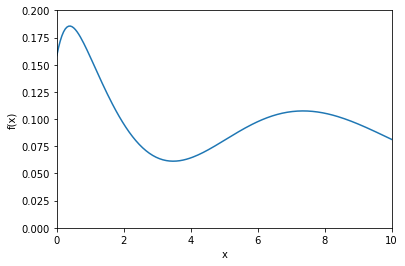

In [3]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [4]:
def newt(f, df, x, n):
    for i in range(n):
        if df(x) == 0:
            return x
        x = numpy.abs(x - f(x)/df(x))
    return x
def sigma(x):
        return ((1/12)*(1/norm))*((18*x)-((2*numpy.sqrt(3*x))*(numpy.sin(2*numpy.sqrt(3*x))))-(numpy.cos(2*numpy.sqrt(3*x)))+(24*numpy.arctan(x)))
def genSample(npts):
    sample = []
    for i in range(0,npts):
        t = random.random()
        def diff(x):
            return sigma(x)-t
        x = newt(diff, f, 6, 500)
        if x>10:
            t=random.random()
            x = newt(diff,f,9,10)
        sample.append(x)
    return numpy.array(sample)

In [7]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


Text(0.5,1,'Histogram showing the probabilty of returning different x values')

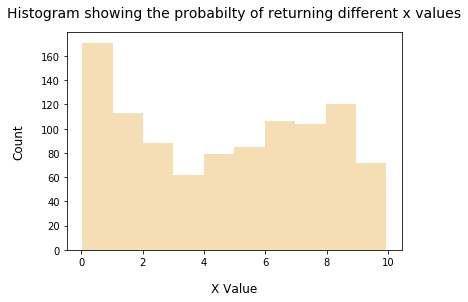

In [6]:
x=numpy.linspace(0,10,103)
plt.hist(genSample(1000), color="wheat")
plt.xlabel("X Value", size=12, labelpad=15)
plt.ylabel("Count", size=12, labelpad=15)
plt.title("Histogram showing the probabilty of returning different x values", size=14, pad=15)